In [ ]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4adcf39095fb330d174ec0286dfc2128034c5d2c11c5f03ed0a51382e5ee0a93
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score

        alpha      beta  virus_type
0    0.005502  0.044563           0
1    0.039869  0.651985           1
2    4.080153  2.846110           2
3    0.064643  0.007520           0
4    0.033151  0.587535           1
..        ...       ...         ...
295  2.475958  1.272798           1
296  6.668269  2.832986           2
297  1.059203  0.120657           0
298  1.809974  4.359600           1
299  6.243641  3.195654           2

[300 rows x 3 columns]


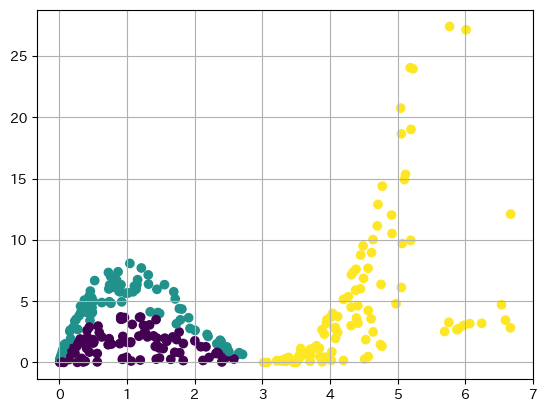

In [ ]:
# ラベルごとに色分け（一番簡素なコード）

df = pd.read_csv('virus.csv')
print(df)
plt.scatter(df['alpha'], df['beta'], c = df['virus_type'])
plt.grid()
plt.show()

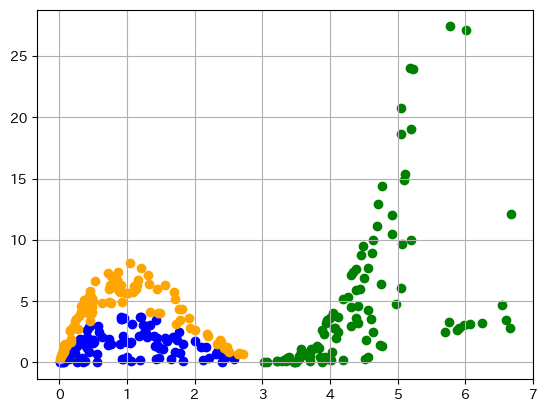

In [ ]:
# ラベルごとに任意の色で色分けしたい（ラベルごとにデータフレームを分けたコード）

df = pd.read_csv('virus.csv')

df_A = df[df['virus_type']==0] # ブールインデックス参照
df_B = df[df['virus_type']==1]
df_C = df[df['virus_type']==2]

plt.scatter(df_A['alpha'], df_A['beta'], color="blue")
plt.scatter(df_B['alpha'], df_B['beta'], color="orange")
plt.scatter(df_C['alpha'], df_C['beta'], color="green")
plt.grid()
plt.show()

['blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green', 

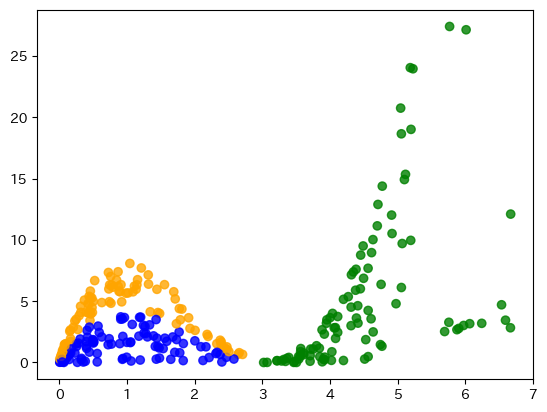

In [ ]:
# ラベルごとに任意の色で色分けしたい（カラーパレットを利用）

df = pd.read_csv("virus.csv")
X = df[['alpha','beta']].to_numpy()
y = df['virus_type'].to_numpy()
#print(X)
#print(y)
c_palette = ['blue','orange','green']
y_color = [c_palette[num] for num in y]
print(y_color)

plt.scatter(X[:,0], X[:,1], c = y_color, alpha=0.8)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_boundary(model, X, Y, target, xlabel, ylabel, model_name):
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])
    #ステップ関数
    def step_func(x,theta=0.5):
        if x >= theta :
            return 1.0
        else :
            return 0.0
    plt.figure(figsize=(7, 5))
    vfunc = np.vectorize(step_func)
    if 1:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        #pred = vfunc(vec_w[0]*XX + vec_w[1]*YY+vec_w[2])
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        plt.contour(XX, YY, pred, colors="gray")
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    #print("-------------------------------")
    #print(pred)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{model_name}による予測')
    plt.show()

# 今日のメイン

モデルが同じ SVC でもハイパーパラメータが異なると、モデルのふるまいは異なる。

SVC のハイパーパラメータ：

C			：値が小さいほど誤りを許容する。大きいほど誤りを許容しなくなり、
学習データにフィットしようとするので、過学習になりやすくなる。

gamma		：学習時分布の広がり度合いを決める。値が小さいほど緩やかな分布に
なり、感度が下がる。 逆に値が大きくなると、過学習になりやすくなる。


テストデータの正解率は 95.55555555555556 ％

５人の患者の型の予測値は[0 2 2 1 2]
つまり
[1.  1.3] の患者は、型 A に罹っていると予測される
[3.5 0.2] の患者は、型 C に罹っていると予測される
[4.5 2.2] の患者は、型 C に罹っていると予測される
[0.5 6.7] の患者は、型 B に罹っていると予測される
[3.  5.2] の患者は、型 C に罹っていると予測される


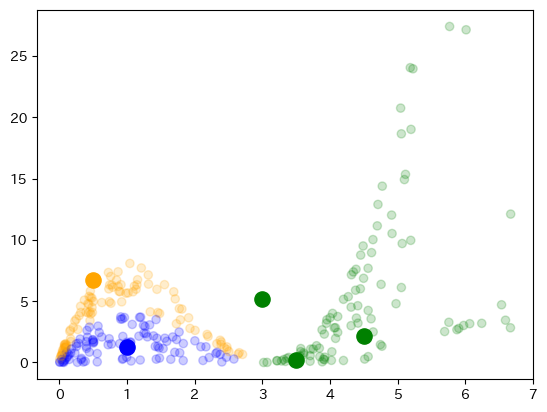

なお、５人の患者が、それぞれの型に罹っている確率は、A, B, C の順に
[[9.84423778e+01 2.77740912e-01 1.27988128e+00]
 [8.52718527e-02 2.09591515e-01 9.97051366e+01]
 [6.51980421e-01 9.59913364e-01 9.83881062e+01]
 [1.74210375e+00 9.68731510e+01 1.38474523e+00]
 [5.08210982e+00 1.63365809e+01 7.85813093e+01]]%


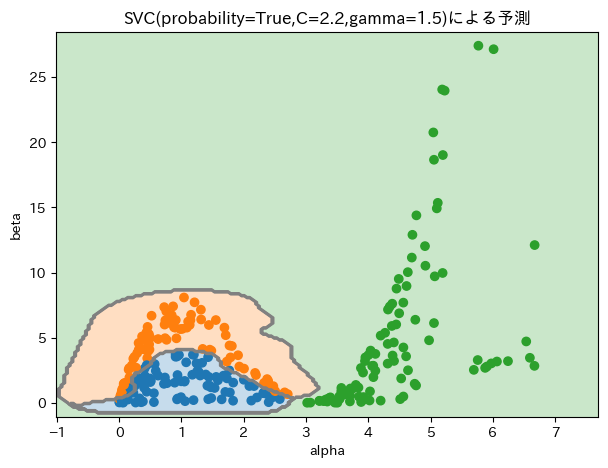

In [ ]:
df = pd.read_csv("virus.csv")

X = df[['alpha','beta']].to_numpy()    #X = df.iloc[:,0:2] でも良い。
y = df['virus_type'].to_numpy()
c_palette = ['blue','orange','green']
y_color = [c_palette[num] for num in y]
#print(y_color)

# 学習データとテストデータを分ける。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#print(y_test.shape)



# 学習モデルの選択
from sklearn.svm import SVC
model = SVC(probability=True)

from sklearn.svm import SVC
#model = SVC(probability=True)
#model_name = 'SVC(probability=True)'

#model = SVC(probability=True, C=1.3)
#model_name = 'SVC(probability=True,C=1.3)'

#model = SVC(probability=True,C=2.2)
#model_name = 'SVC(probability=True,C=2.2)'

model = SVC(probability=True,C=2.2,gamma=1.5)
model_name = 'SVC(probability=True,C=2.2,gamma=1.5)'

from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#model_name = 'ロジスティック回帰'

from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#model_name = 'ランダムフォレスト(RandomForestClassifier)'

from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=6)
#model_name = 'k近傍法(KNeighborsClassifier)'

from sklearn.neural_network import MLPClassifier
#model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#       beta_2=0.999, early_stopping=False, epsilon=1e-08,
#       hidden_layer_sizes=(30,30,),max_iter=10000)
#model_name = 'ニューラルネットワーク(MLPClassifier)'

from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#model_name = '決定木(DecisionTreeClassifier)'

'''
model = DecisionTreeClassifier(criterion='gini',               # 不純度の計測指標
                               splitter='best',                # 各ノードの分割方法
                               max_depth=None,                 # 決定木の深さの最大値
                               min_samples_split=2,            # 枝の分岐作成に必要な最低データ数
                               min_samples_leaf=1,             # 葉ノードの作成に必要な最低データ数
                               min_weight_fraction_leaf=0.0,   # 各葉ノードに必要なデータの割合の最小値
                               max_features=None,              # 分割時に利用する特徴数の最大値
                               random_state=None,              # 乱数シード
                               max_leaf_nodes=None,            # 作成する葉ノードの最大値
                               min_impurity_decrease=0.0,      # ノードの分割実行するための不純度の最小減少度
                               class_weight=None,              # 各クラスラベルに対する重み
                               ccp_alpha=0.0                   # コスト複雑度枝刈りのパラメータ
                                   )
'''



# 学習データを学習させ、テストデータの正解率を求める。
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
seikairitsu = accuracy_score(y_test, y_pred)
print(f"テストデータの正解率は {seikairitsu*100} ％")
print()

# 新たな５人の患者の予測をする。
new_X = np.array([[1.0, 1.3], [3.5, 0.2], [4.5, 2.2], [0.5, 6.7], [3.0, 5.2]])
new_y_pred = model.predict(new_X)
print(f'５人の患者の型の予測値は{new_y_pred}')
print('つまり')

# 描画する
plt.scatter(X[:,0], X[:,1], c=y_color, alpha=0.2)
for patient in zip(new_X, new_y_pred):
    print(f"{patient[0]} の患者は、型 {chr(65 + patient[1])} に罹っていると予測される")
    # 0ならA（Unicodeポイント：65）,1ならB（Unicodeポイント：66）,2ならC（Unicodeポイント：67)
    plt.scatter(patient[0][0], patient[0][1], color = c_palette[patient[1]], marker="o", s=120)
plt.show()

# ５人の患者が罹っている型の確率を求める。
kakuritsu = model.predict_proba(new_X)
print('なお、５人の患者が、それぞれの型に罹っている確率は、A, B, C の順に')
print(f"{kakuritsu*100}%")

plot_boundary(model, X[:,0], X[:,1], y, "alpha", "beta", model_name)



* zip()

  複数のイテラブル（リスト、タプル、など）から要素を１つずつ取り出してイテレーションするための関数です。

  各イテラブルから同じインデックスに位置する要素をまとめて取り出す
* ord()

  文字列とUnicodeポイント間の変換を行う関数

   文字　→　Unicodeポイントに変換。

  ord は "ordinal"（順序付け）という意味。

  【例】ord('A') は、文字 'A' の Unicodeポイント 65 を返す。

* chr()

  文字列とUnicodeポイント間の変換を行う関数

  Unicodeポイント　→　文字　に変換。
  
  chr は "character"（文字）という意味。
  
  【例】chr(65) は Unicodeポイント 65 に対応する文字 'A' を返す。
